In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [331]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [332]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Exploratory Data Analysis

In [333]:
# Dataset main info

display(df.info(verbose = True, show_counts = True))

print("\nDataset shape: ", df.shape)
print("\nMain description")
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None


Dataset shape:  (41188, 21)

Main description


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* набір містить 41.2 тисячу записів з 20 фічами, 10 з яких є числовими, 10 категоріальними
* null значення відсутні
* в наборі присутні викиди за різними фічами
* багато клієнтів, з якими раніше не контактувались (pdays=999)

In [334]:
df.select_dtypes(object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [335]:
print('Unique values for columns')
for object_column in df.select_dtypes(object).columns:
    print(f"{object_column}: {df[object_column].unique()}")

Unique values for columns
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


Категоріальні змінні `default`, `housing`, `loan`, `y` замінимо на числові

In [336]:
object_columns = df.select_dtypes(object).columns
numeric_columns = df.select_dtypes([float, int]).columns

columns_to_replace = ['default', 'housing', 'loan', 'y']
map_to_replace = {"yes": 1, "no": 0, "unknown": -1}

for column in columns_to_replace:    
    df[column] = df[column].apply(lambda x: map_to_replace.get(x))

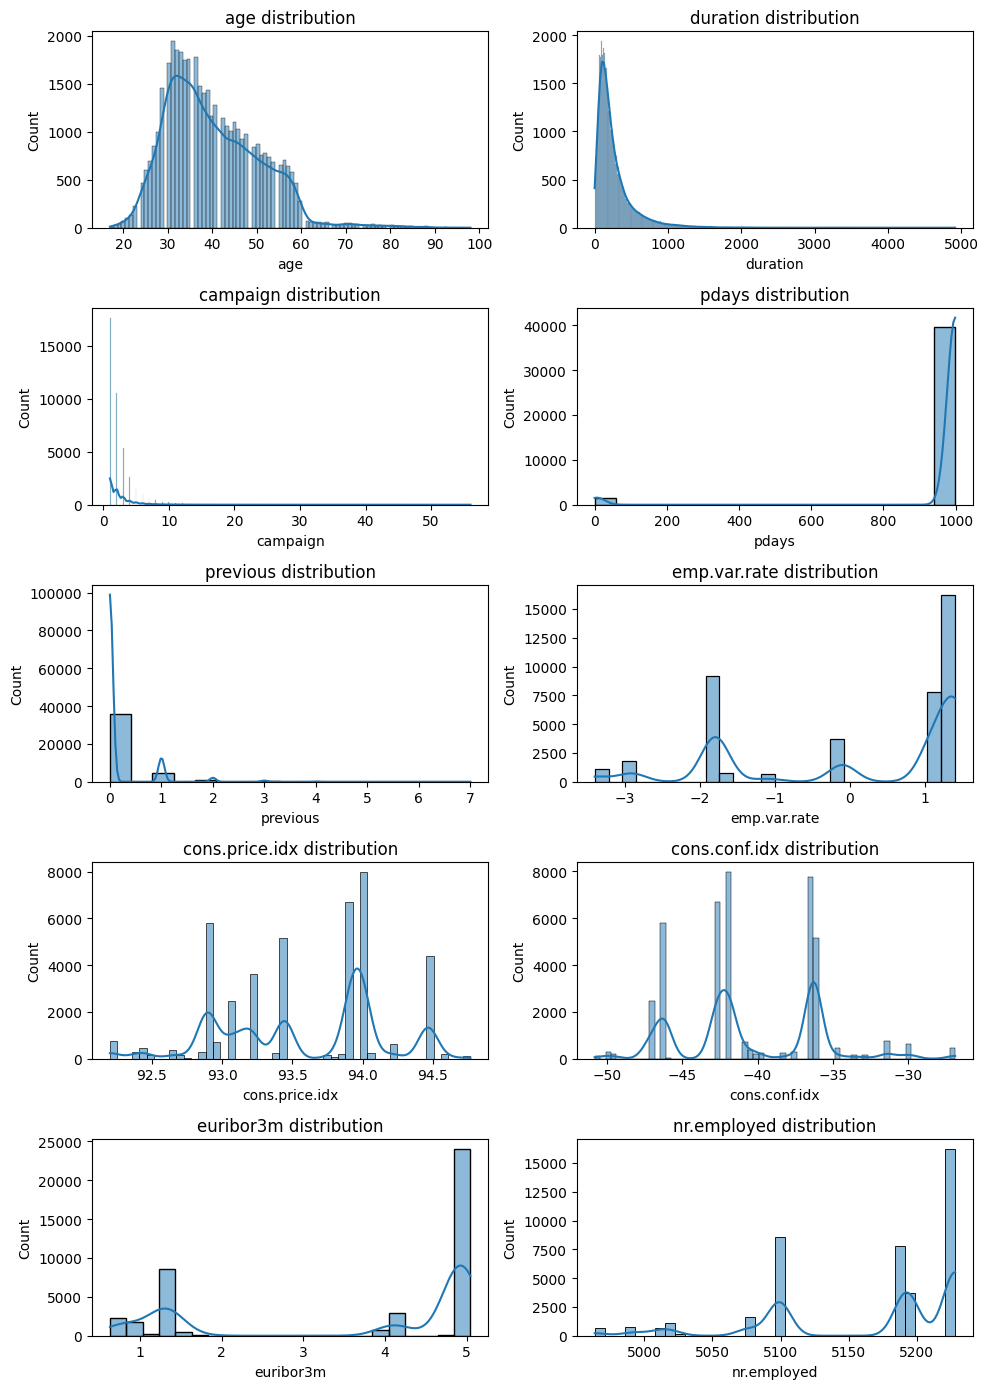

In [337]:
fig, ax = plt.subplots(5, 2, figsize=(10, 14))
ax = ax.flatten() 

for idx, column in enumerate(numeric_columns):  
    sns.histplot(df[column], kde=True, ax=ax[idx])  
    ax[idx].set_title(f"{column} distribution")

plt.tight_layout()
plt.show()

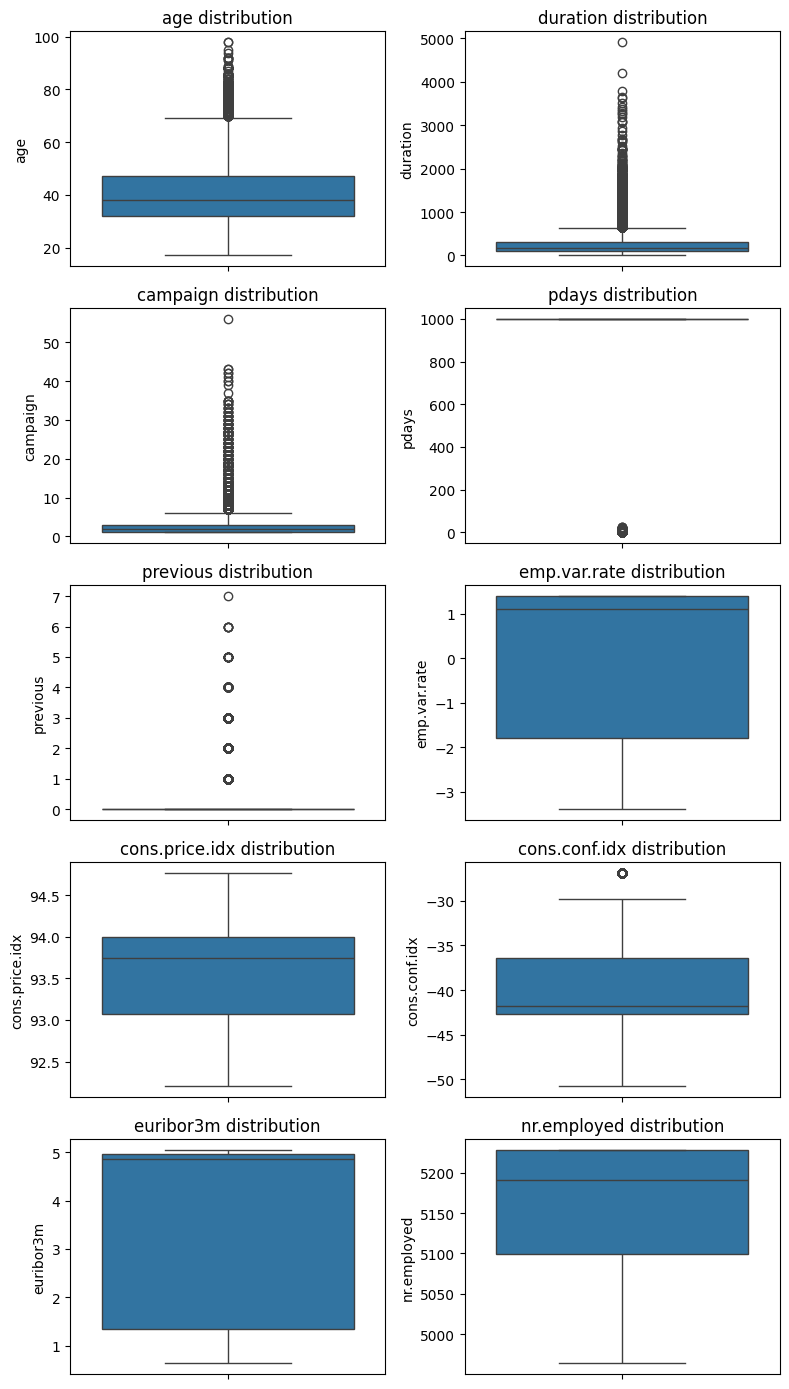

In [338]:
fig, ax = plt.subplots(5, 2, figsize=(8, 14))
ax = ax.flatten() 

for idx, column in enumerate(numeric_columns):  
    sns.boxplot(df[column], ax=ax[idx])  
    ax[idx].set_title(f"{column} distribution")

plt.tight_layout()
plt.show()

* `age` - переважна більшість це клієнти віком до 40 років, присутній різкий спад клієнтів віком від 60 років. Аномалії присутні в клієнтах віком від 65
* `duration` - наявний правоскошений розподіл, присутні клієнти з тривалістю дзвінка більше 1000 секунд. Можливо розглянути їх як окрему категорію, або логарифмувати розподіл
* `campaing` - кількість контактів монотонно спадає, більшість клієнтів контактують менше 5 разів для оформлення депозиту
* `pdays` - наявний викид 999, що свідчить про наявність значної кількості клієнтів, з якими раніше не контактували. Доцільно розділити на додаткову категорію (контактували раніше / не контактували)
* `previous` - значення 0 показує що багато клієнтів з якими не контактували в межах попередньої кампанії, припускаю що це нові клієнти
* `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed` - індекси, які потребують додаткового аналізу та виявлення залежностей від змінної таргету

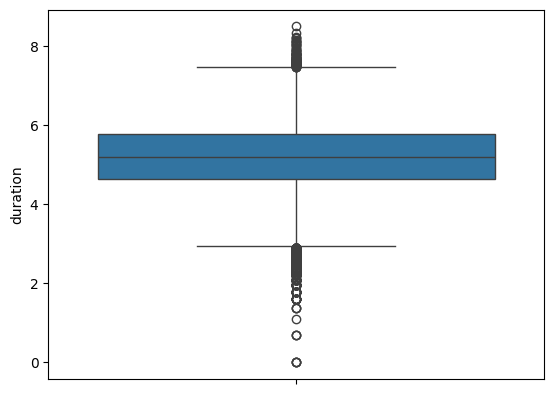

Кількість викидів без трансформації: 2963
Кількість викидів без трансформації: 985


In [347]:
sns.boxplot(np.log1p(df['duration']))
plt.show()

IQR = df['duration'].quantile(0.75) - df['duration'].quantile(0.25)
min_outlier_value = df['duration'].quantile(0.25) - IQR * 1.5
max_outlier_value = df['duration'].quantile(0.75) + IQR * 1.5

print(f"Кількість викидів без трансформації: {
    df[(df['duration'] >= max_outlier_value) | (df['duration'] <= min_outlier_value)].shape[0]
}")

IQR = np.log1p(df['duration']).quantile(0.75) - np.log1p(df['duration']).quantile(0.25)
min_outlier_value = np.log1p(df['duration']).quantile(0.25) - IQR * 1.5
max_outlier_value = np.log1p(df['duration']).quantile(0.75) + IQR * 1.5

print(f"Кількість викидів без трансформації: {
    df[(np.log1p(df['duration']) >= max_outlier_value) | (np.log1p(df['duration']) <= min_outlier_value)].shape[0]
}")

Здійснимо логарифмування колонки `duration` для мінімізації викидів

In [75]:
object_columns_remaining = list(set(object_columns) - set(columns_to_replace))

print("Список object змінних що залишились: ", object_columns_remaining)

Список object змінних що залишились:  ['month', 'job', 'poutcome', 'contact', 'marital', 'education', 'day_of_week']


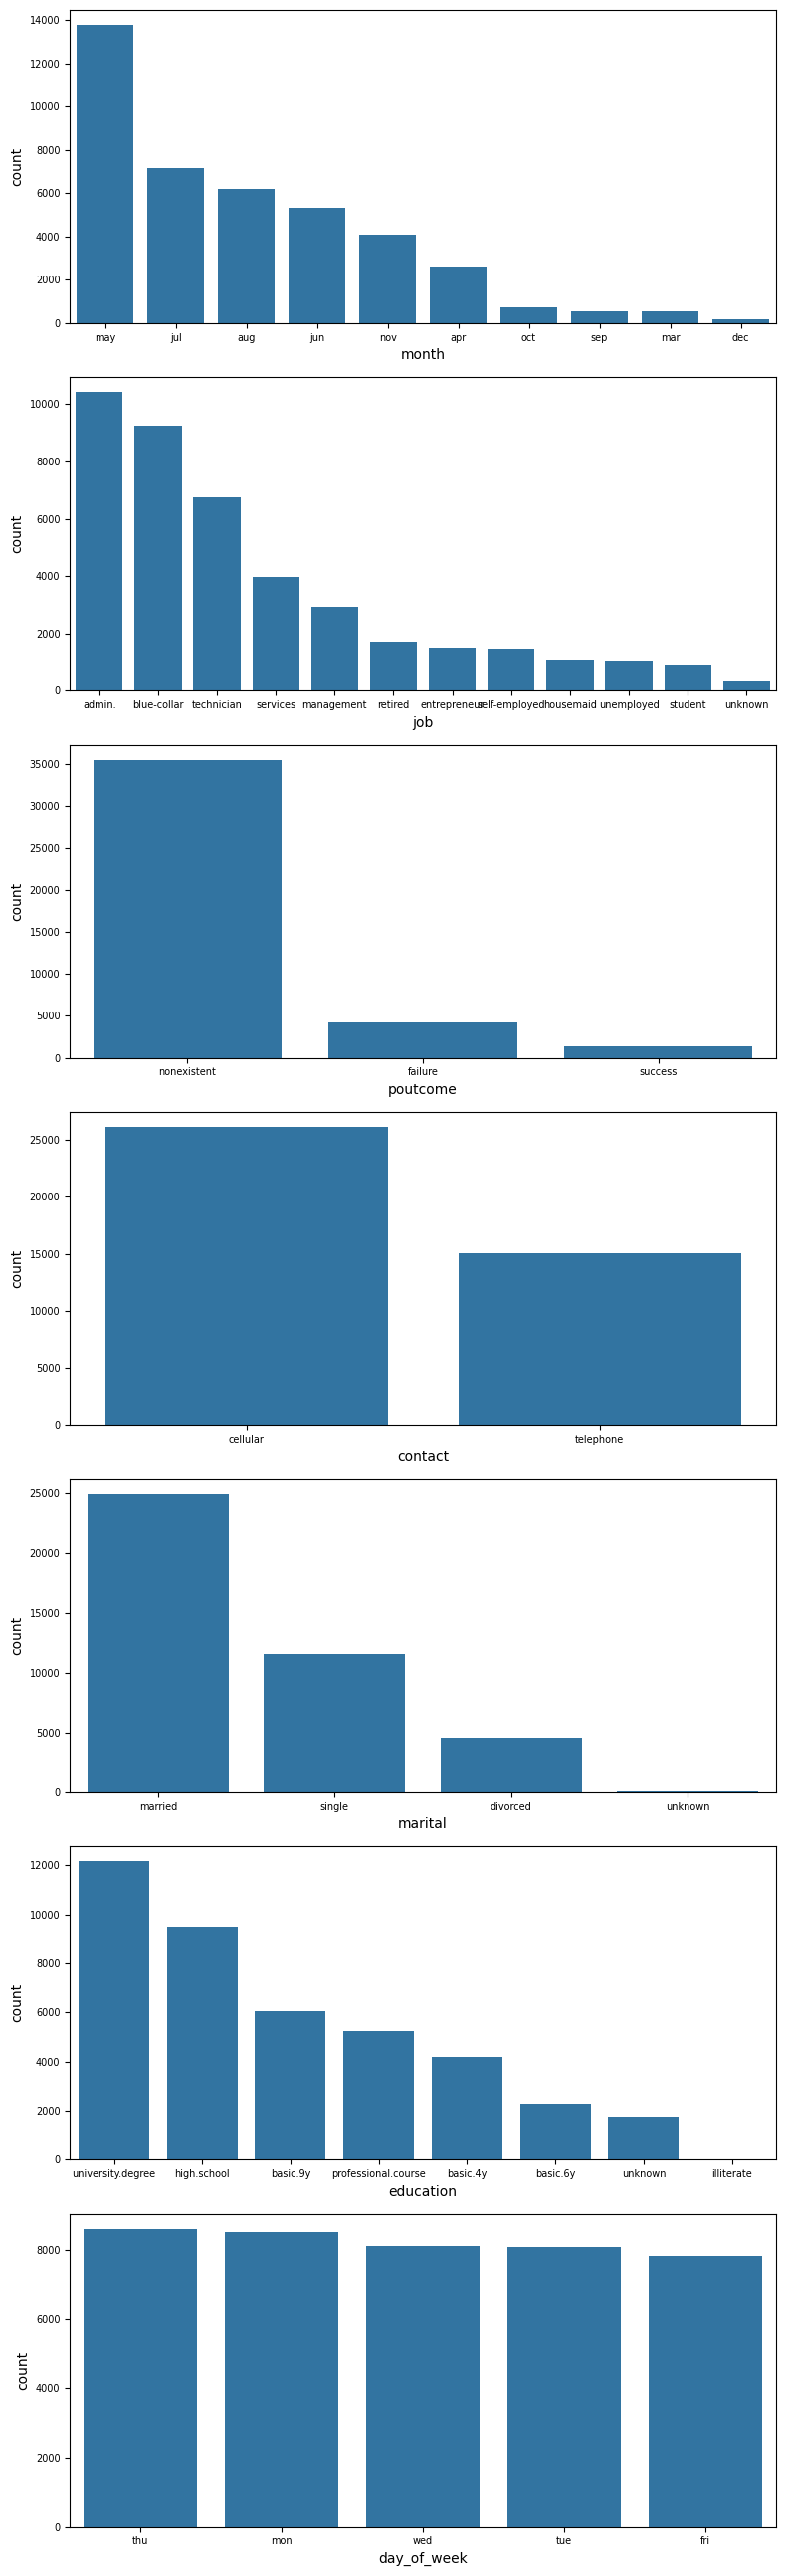

In [83]:
fig, ax = plt.subplots(7, 1, figsize=(8, 26))
ax = ax.flatten() 

for idx, column in enumerate(object_columns_remaining):  
    sns.barplot(df[column].value_counts(), ax=ax[idx])
    ax[idx].tick_params(axis='both', labelsize=7)

plt.tight_layout()
plt.show()

* найбільше видають кредитів в травні, не залежно від дня тижня
* `poutcome`: присутня велика кількість значень nonexistent, що свідчить про велику кількість нових, клієнтів. Скоріше за все це корелює із `pdays`, `previous`
* клієнти мають роботу, освіту, переважно одружені
* переважний канал залучення - мобільні телефони

### Сформуємо орієнтовний портрет клієнта:
1. Клієнти віком від 25 до 60 років
2. Мають освіту та роботу, переважно одружені
3. Нові клієнти
4. Активні клієнти, які повторно беруть кредит та комунікували менше 5 разів
5. Планують оформити кредит в літню пору року

## Detailed Variable Analysis

In [290]:
def plot_numerical_distribution(df, column):

    fig = plt.figure(figsize=(6, 4))
    
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    min_outlier_value = df[column].quantile(0.25) - IQR * 1.5
    max_outlier_value = df[column].quantile(0.75) + IQR * 1.5
    
    sns.kdeplot(data=df[df['y'] == 0], x=column, color='grey', label='y=0 all')
    sns.kdeplot(data=df[df['y'] == 1], x=column, color='brown', label='y=1 all')
    sns.kdeplot(data=df[(df['y'] == 0) & (min_outlier_value <= df[column]) & (df[column] <= max_outlier_value)], x=column, color='pink', label='y=0 no outliers')
    sns.kdeplot(data=df[(df['y'] == 1) & (min_outlier_value <= df[column]) & (df[column] <= max_outlier_value)], x=column, color='lightgreen', label='y=1 no outliers')
    
    plt.title(f"Розподіл {column} за таргетом")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [291]:
def plot_categorical_distribution(df: pd.DataFrame, column: str):
    unique_target_values = df['y'].unique()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # ---- Нормалізований розподіл ----
    proportions = (100 * df.groupby('y')[column].value_counts(normalize=True)).round(2).reset_index()
    proportions.columns = ['y', column, 'proportion']

    sns.barplot(data=proportions, x=column, y='proportion', hue='y', ax=axes[0], palette='viridis')
    axes[0].set_title(f'Нормалізований розподіл за: {column}')
    axes[0].set_ylabel("Відсоток (%)")
    axes[0].tick_params(axis='x', rotation=45)

    # Додавання підписів
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='{:,.1f}%')

    # ---- Кількісний розподіл ----
    counts = df.groupby('y')[column].value_counts().reset_index()
    counts.columns = ['y', column, 'count']

    sns.barplot(data=counts, x=column, y='count', hue='y', ax=axes[1], palette='coolwarm')
    axes[1].set_title(f'Кількість за: {column}')
    axes[1].set_ylabel("Кількість")
    axes[1].tick_params(axis='x', rotation=45)

    # Додавання підписів
    for container in axes[1].containers:
        axes[1].bar_label(container)

    plt.tight_layout()
    plt.show()

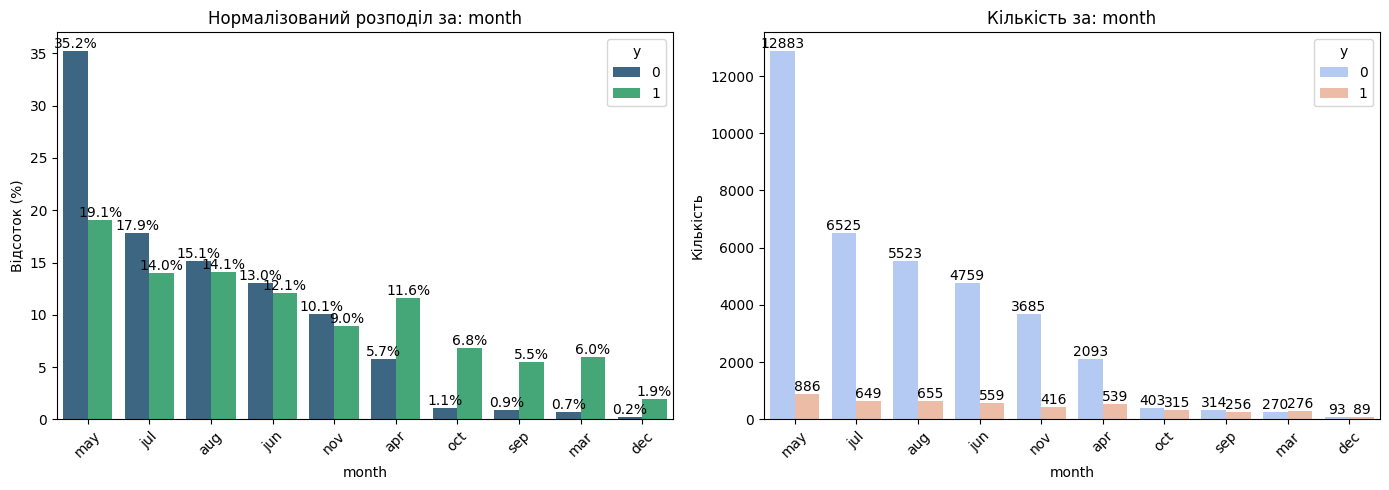

In [292]:
plot_categorical_distribution(df, 'month') 

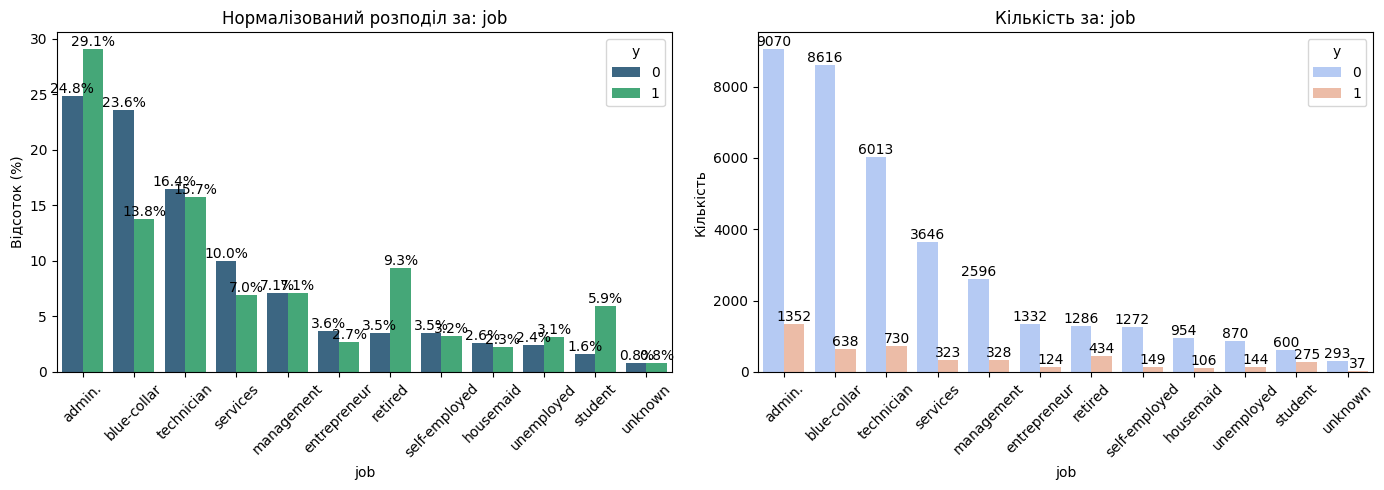

In [293]:
plot_categorical_distribution(df, 'job')

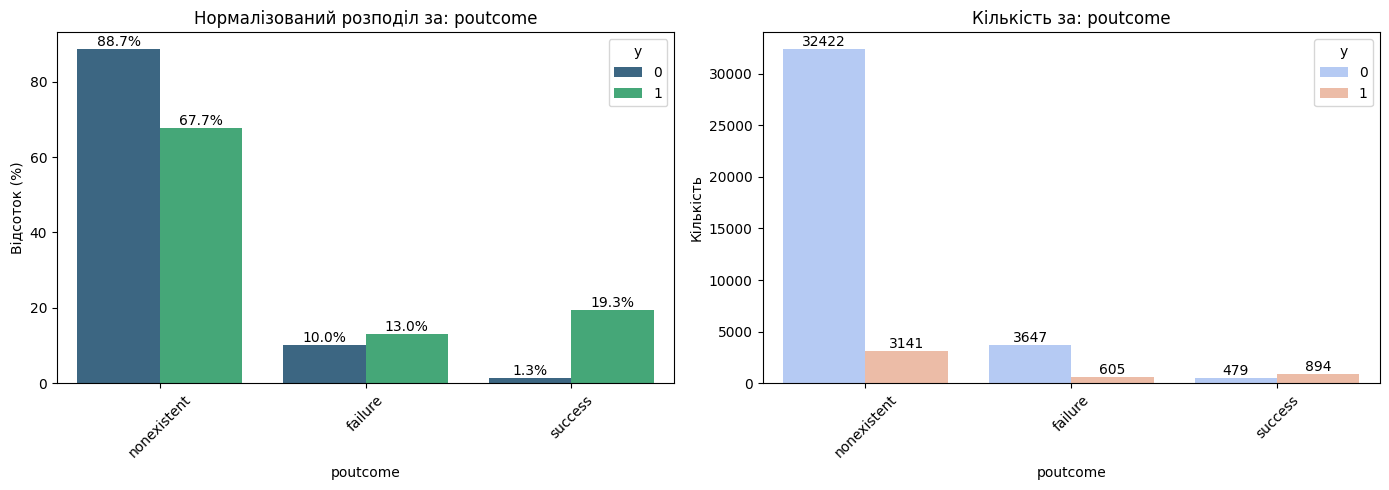

In [294]:
plot_categorical_distribution(df, 'poutcome')

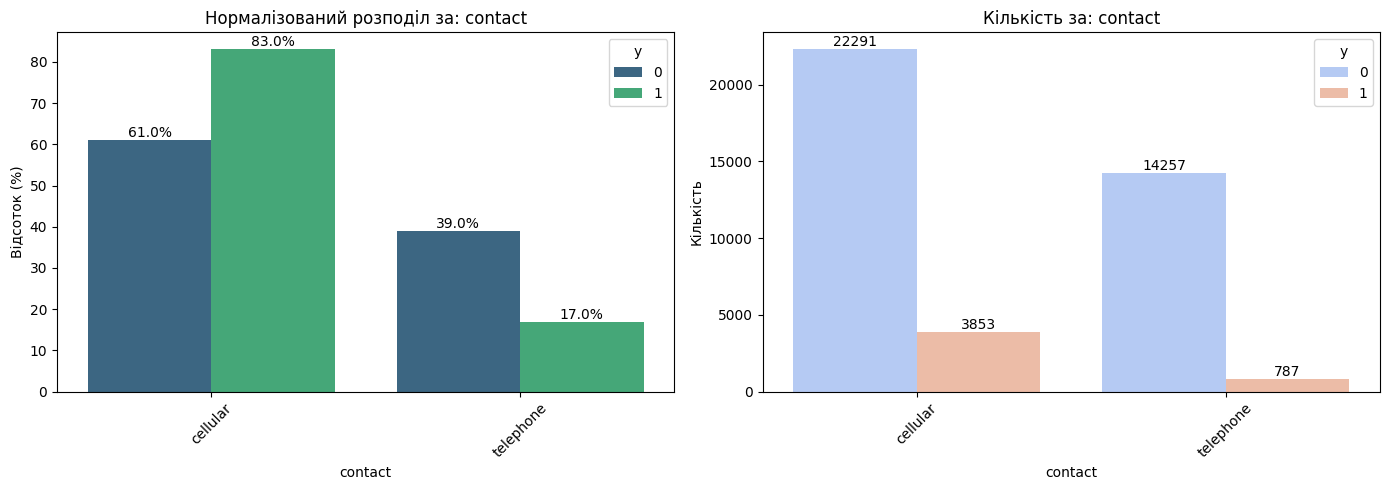

In [295]:
plot_categorical_distribution(df, 'contact')

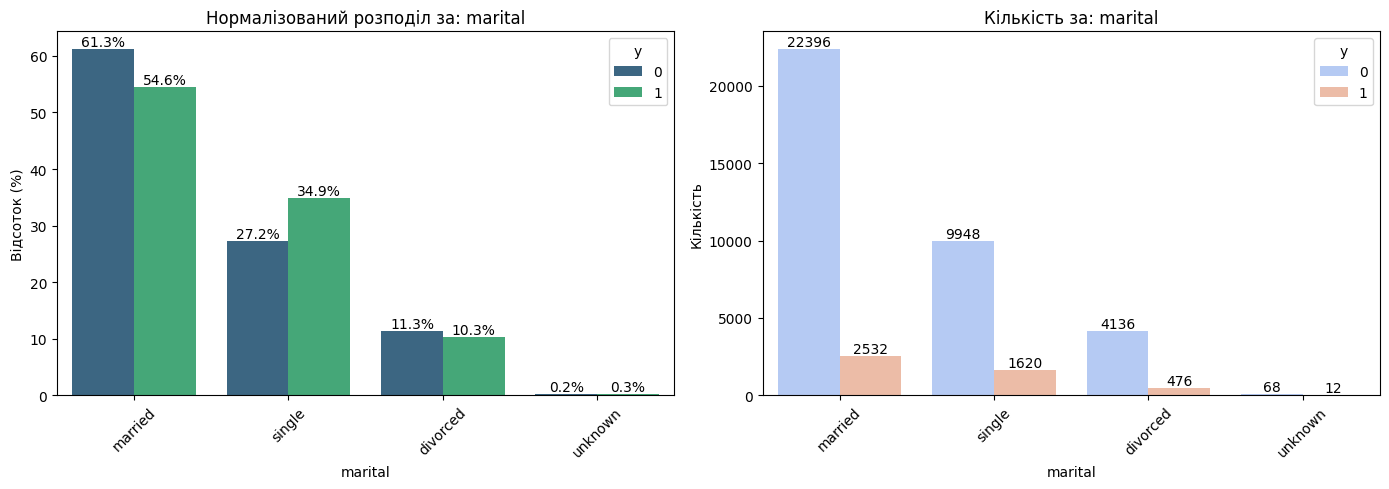

In [296]:
plot_categorical_distribution(df, 'marital')

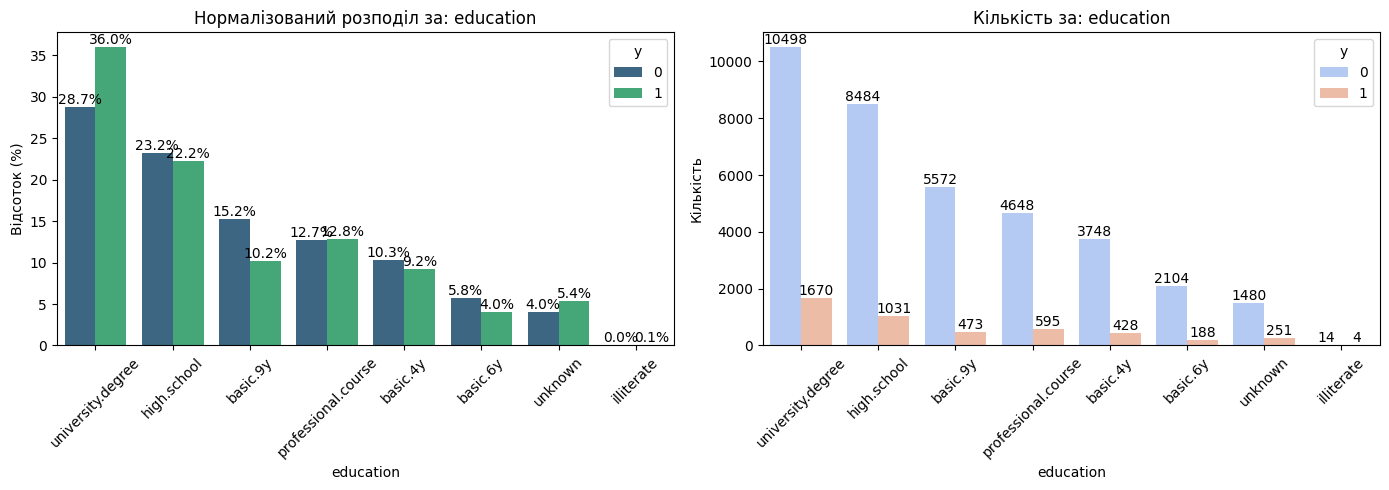

In [297]:
plot_categorical_distribution(df, 'education')

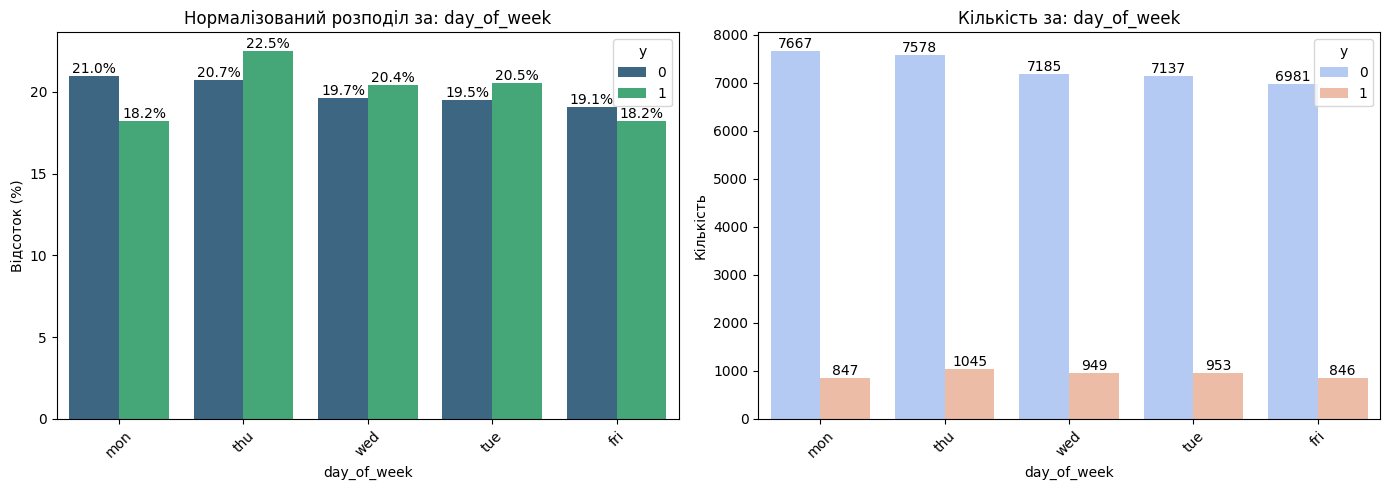

In [298]:
plot_categorical_distribution(df, 'day_of_week')

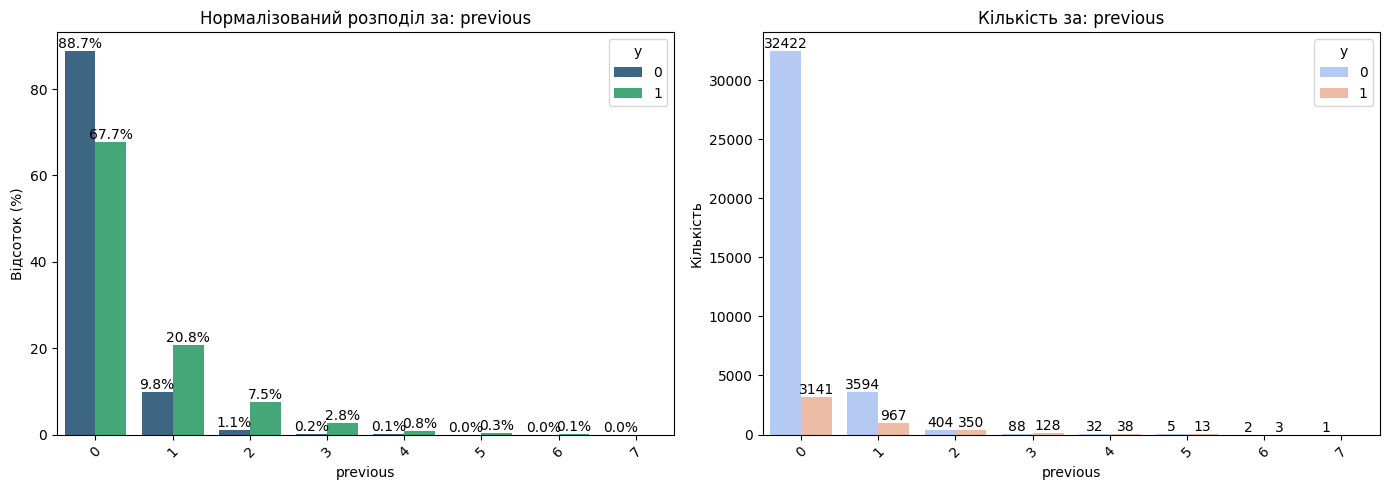

In [299]:
# додатково переглянемо змінну previous так як там фіксовані цілочисельні значення
plot_categorical_distribution(df, 'previous')

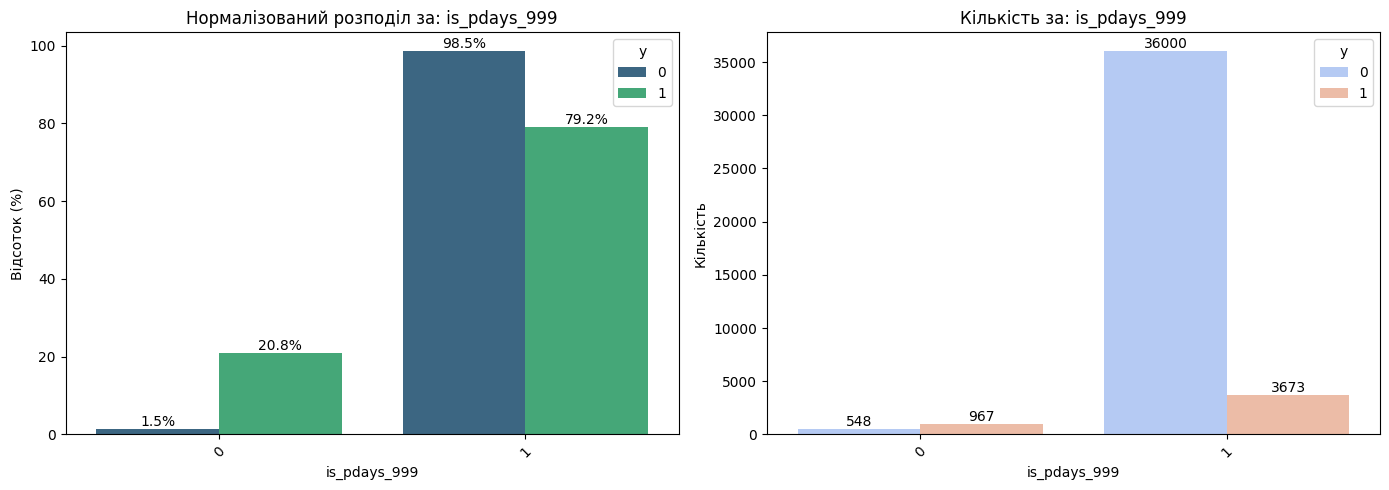

In [300]:
# створення категорії pdays=999 так чи ні
df['is_pdays_999'] = df['pdays'].apply(lambda x: 1 if x == 999 else 0)

plot_categorical_distribution(df, 'is_pdays_999')

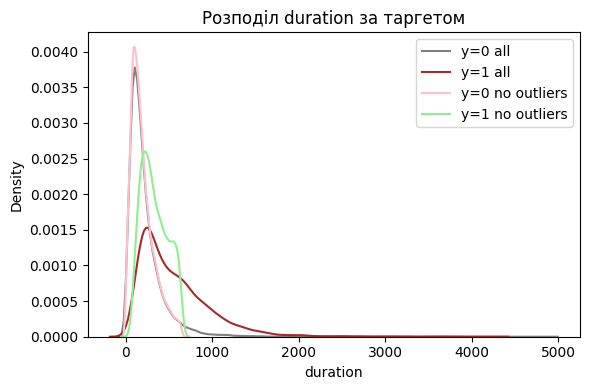

In [281]:
plot_numerical_distribution(df, 'duration')

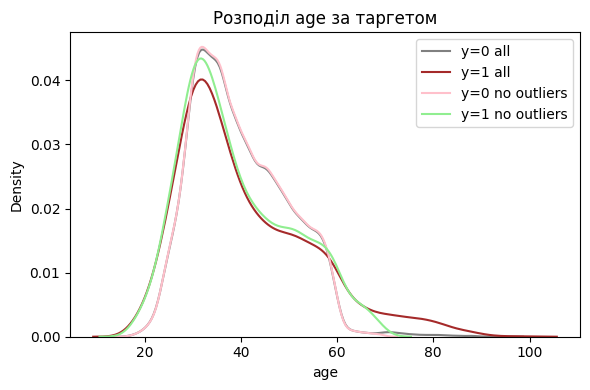

In [282]:
plot_numerical_distribution(df, 'age')

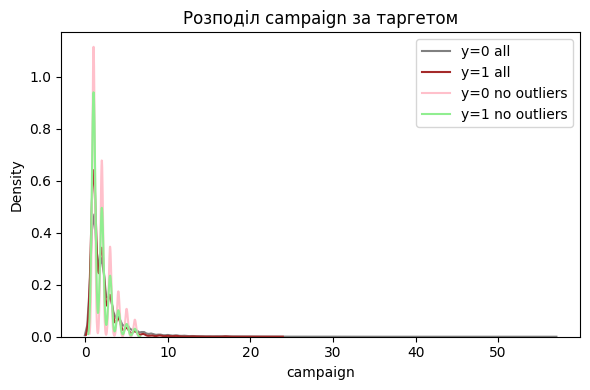

In [283]:
plot_numerical_distribution(df, 'campaign')

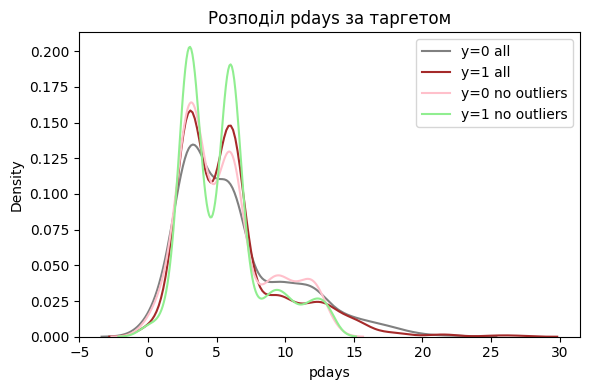

In [284]:
plot_numerical_distribution(df[df['pdays'] != 999], 'pdays')

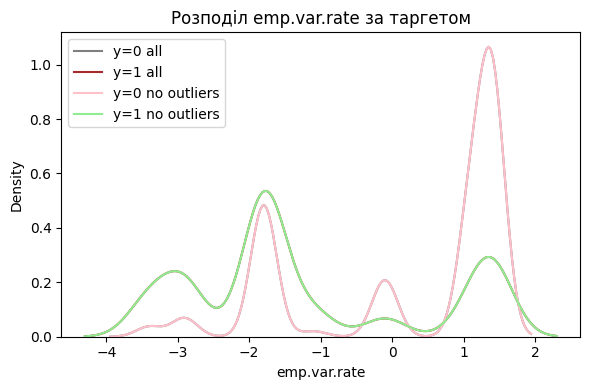

In [285]:
plot_numerical_distribution(df, 'emp.var.rate')

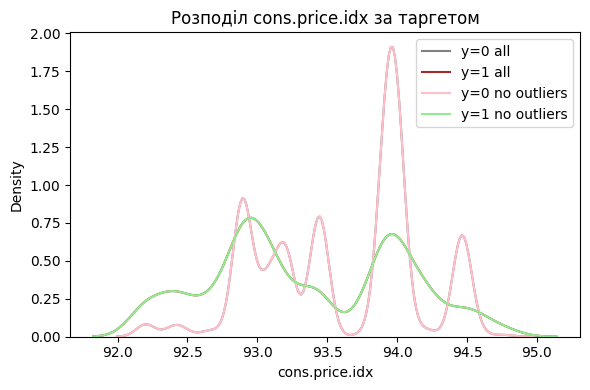

In [286]:
plot_numerical_distribution(df, 'cons.price.idx')

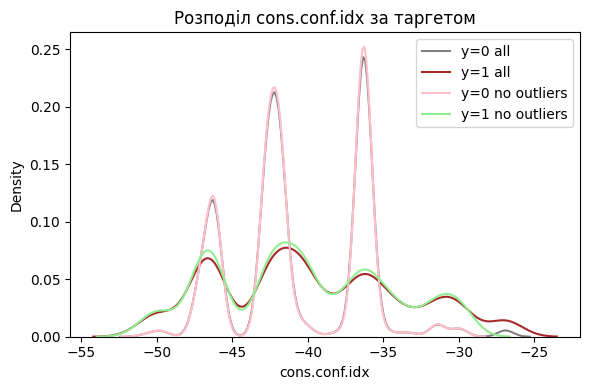

In [287]:
plot_numerical_distribution(df, 'cons.conf.idx')

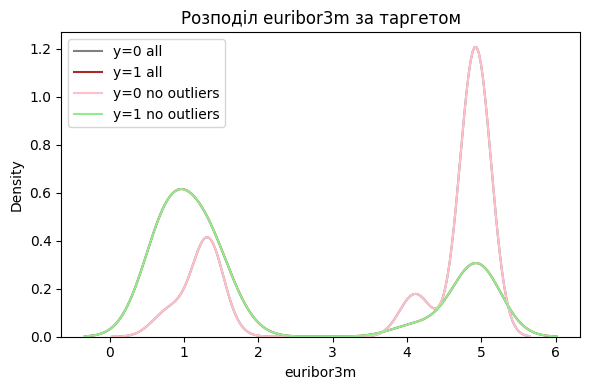

In [288]:
plot_numerical_distribution(df, 'euribor3m')

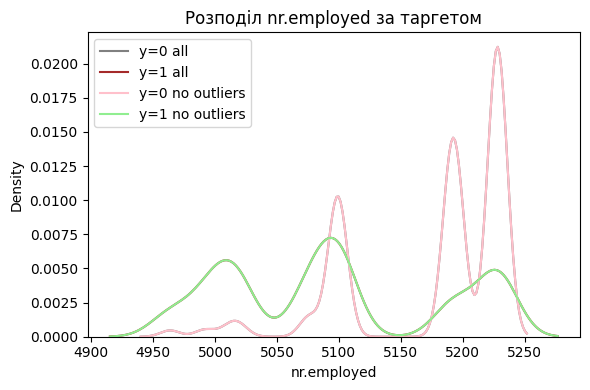

In [289]:
plot_numerical_distribution(df, 'nr.employed')

* багато клієнтів, які проявили бажання взяти кредит в травні, проте в більшості їм відмовляють. Клієнти, які беруть кредит в квітні, жовтні, вересні, травні та грудні мають найбільші шанси на отримання кредиту, проте таких клієнтів небагато
* адміни, пенсіонери та студенти мають більший шанс на отримання кредиту
* клієнти з попередньою успішною кампанією отримують більше кредитів
* клієнти з вищою освітою, яких залучили через мобільні телефони, клієнти в яких не було дзвінків, самотні отримують більше кредитів
* клієнти які мали дзвінок більше 1000 секунд менше отримують кредитів
* клієнти з nr.employed до 5070 більше отримують кредитів

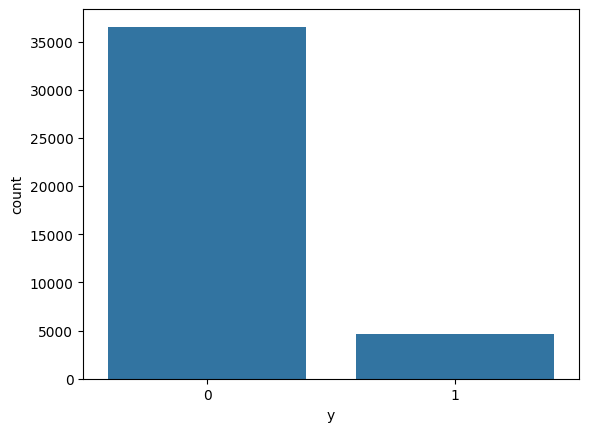

In [324]:
sns.barplot(df['y'].value_counts())
plt.show()

Присутній дизбаланс класів в наборі даних

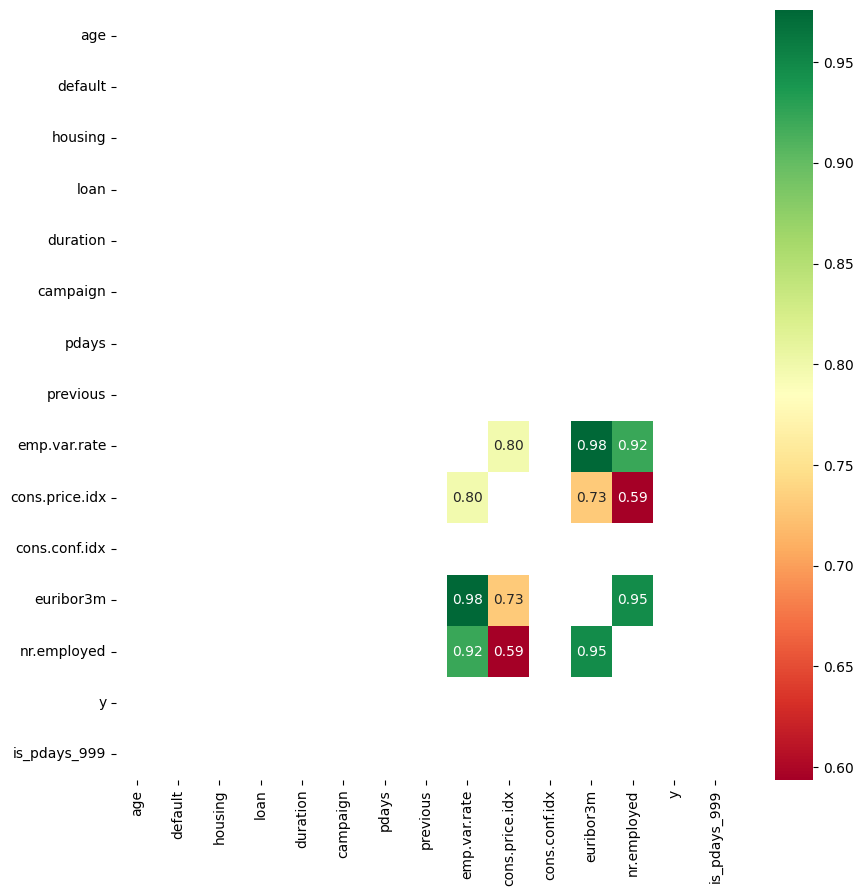

In [316]:
corr_y_0 = df[df['y'] == 0].select_dtypes(['int', 'float']).corr()

fig = plt.figure(figsize=(10, 10))
sns.heatmap(data = corr_y_0[(corr_y_0 >= 0.5) & (corr_y_0 <= 0.999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

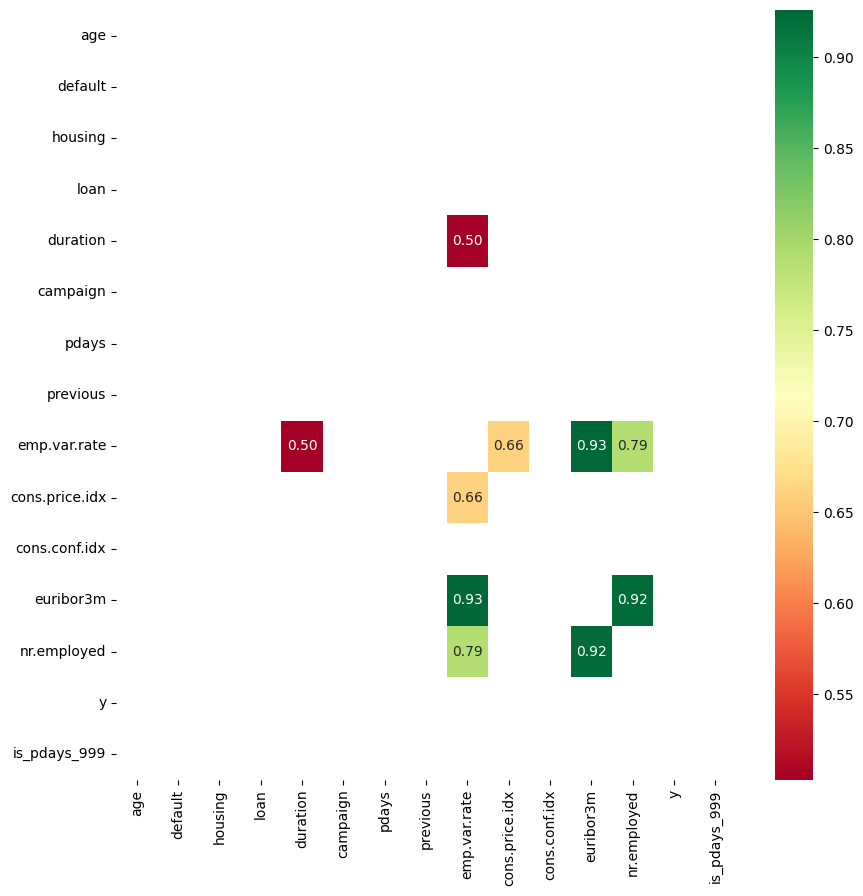

In [318]:
corr_y_1 = df[df['y'] == 1].select_dtypes(['int', 'float']).corr()

fig = plt.figure(figsize=(10, 10))
sns.heatmap(data = corr_y_1[(corr_y_1 >= 0.5) & (corr_y_1 <= 0.999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [320]:
correlation_matrix = df.select_dtypes(['int', 'float']).corr()
correlation_matrix['y'].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
default           0.099199
cons.conf.idx     0.054878
age               0.030399
housing           0.011379
loan             -0.003142
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
is_pdays_999     -0.324877
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

`emp.var.rate`, `euribor3m`, `nr.employed` - важливі змінні які корелюють між собою

`duration`, `previous`, `euribor3m`, `is_pdays_999`, `pdays`, `nr.employed` - важливі зміння, які корелюють з таргетом